In [1]:
from fastai.tabular import *

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/adult_sample/models'),
 PosixPath('/home/jupyter/.fastai/data/adult_sample/export.pkl'),
 PosixPath('/home/jupyter/.fastai/data/adult_sample/adult.csv')]

In [3]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [4]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
procs = [FillMissing, Categorify, Normalize]

In [5]:
data = (TabularList.from_df(df, cat_names, cont_names, procs)
        .split_by_idx(list(range(800, 1000)))
        .label_from_df(dep_var)
        .databunch())

In [6]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
Local-gov,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,False,0.8365,-0.9219,-0.0312,-0.1459,-0.2164,-0.0356,<50k
Private,9th,Never-married,Craft-repair,Own-child,White,Female,United-States,False,-1.5823,-1.1052,-1.9869,-0.1459,-0.2164,-1.9796,<50k
Private,HS-grad,Never-married,Machine-op-inspct,Not-in-family,White,Male,United-States,False,-1.3624,-0.7967,-0.4224,-0.1459,-0.2164,-0.0356,<50k
Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,Black,Male,United-States,False,-0.4095,2.7247,-0.4224,-0.1459,-0.2164,-0.0356,<50k
?,11th,Never-married,?,Own-child,White,Male,United-States,False,-1.5090,2.2161,-1.2046,-0.1459,-0.2164,-0.3596,<50k


In [7]:
learn = tabular_learner(data, layers=[200, 100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


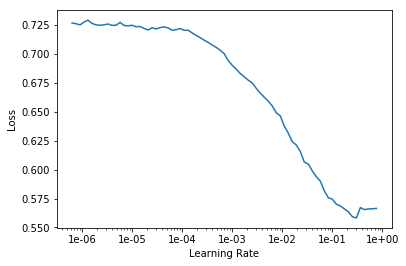

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.335999,0.360935,0.840000,00:03
1,0.338191,0.337592,0.855000,00:03
2,0.336247,0.341780,0.855000,00:03
3,0.326203,0.336977,0.860000,00:03
4,0.310921,0.346511,0.865000,00:03
